# 2D function visualization with contours

Victor Kitov, <https://victorkitov.github.io>

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
pylab.rcParams['figure.figsize'] = (4.0, 2.8)    # default figure size

## Simplified variant

In [3]:
@np.vectorize  # returns an object that acts like pyfunc, but takes arrays as input.
def my_max(a, b):
    if a > b:
        return a
    else:
        return b

x = arange(4)
y = arange(5)

In [4]:
x,y

(array([0, 1, 2, 3]), array([0, 1, 2, 3, 4]))

In [5]:
X,Y = meshgrid(x, y) # grid of point
print(f'X:\n{X}\n')
print(f'Y:\n{Y}\n')

X:
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

Y:
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]



In [6]:
Z = my_max(X, Y) # evaluation of the function on the grid


print(f'Z:\n{Z}\n')

Z:
[[0 1 2 3]
 [1 1 2 3]
 [2 2 2 3]
 [3 3 3 3]
 [4 4 4 4]]



## Drawing arithmetic, geometric and harmonic means

In [7]:
@np.vectorize
def mean(x,y):
    return (x+y)/2


@np.vectorize
def geom(x,y):
    return np.sqrt(x*y)


@np.vectorize
def harm(x,y):
    return 2/(1/x+1/y)

Кто помнит [неравенство между средним ариметическим, геометрическим и гармоническим](https://resolventa.ru/spr/algebra/mean2.htm)?

In [8]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10136/582880078.py:1: SyntaxWarning: invalid escape sequence '\s'
  for i,(fun,name) in enumerate(zip([mean, geom, harm],['standard mean $(x+y)/2$', 'geometric $\sqrt{xy}$', 'harmonic: $2/(1/x+1/y)$'])):


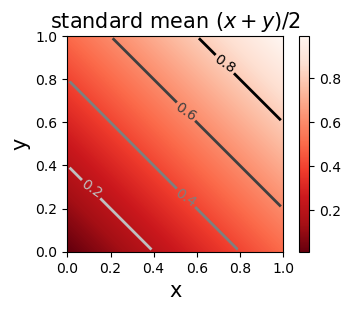

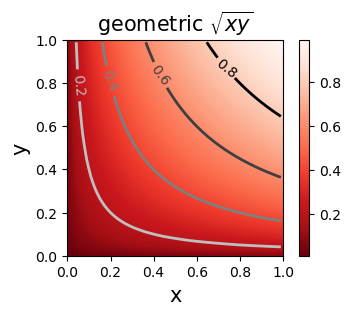

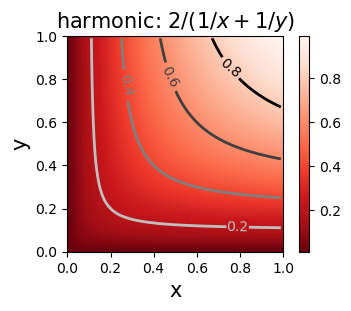

In [9]:
for i,(fun,name) in enumerate(zip([mean, geom, harm],['standard mean $(x+y)/2$', 'geometric $\sqrt{xy}$', 'harmonic: $2/(1/x+1/y)$'])):
    figure()
    x = arange(0.01,1,0.02)
    y = arange(0.01,1,0.02)
    X,Y = meshgrid(x, y) # grid of point
    Z = fun(X, Y) # evaluation of the function on the grid
    
    im = imshow(Z,cmap=cm.Reds_r, extent=[0,1,0,1], origin='lower') # drawing the function
    im.set_interpolation('bilinear')

    # adding the Contour lines with labels
    cset = contour(X,Y,Z,arange(0,1,0.2),linewidths=2,cmap=cm.binary, origin='lower')
    clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

    
    # adding the Contour lines with labels
    colorbar(im) # adding the colobar on the right
    #plt.gca().invert_yaxis()
    # latex fashion title
    FONT_SIZE = 15
    title(name, fontsize=FONT_SIZE)
    xlabel('x', fontsize=FONT_SIZE)
    ylabel('y', fontsize=FONT_SIZE)
    show()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10136/3916968589.py:3: SyntaxWarning: invalid escape sequence '\s'
  for i,(ax,fun,name) in enumerate(zip(axs,[mean, geom, harm],['standard mean $(x+y)/2$', 'geometric $\sqrt{xy}$', 'harmonic: $2/(1/x+1/y)$'])):


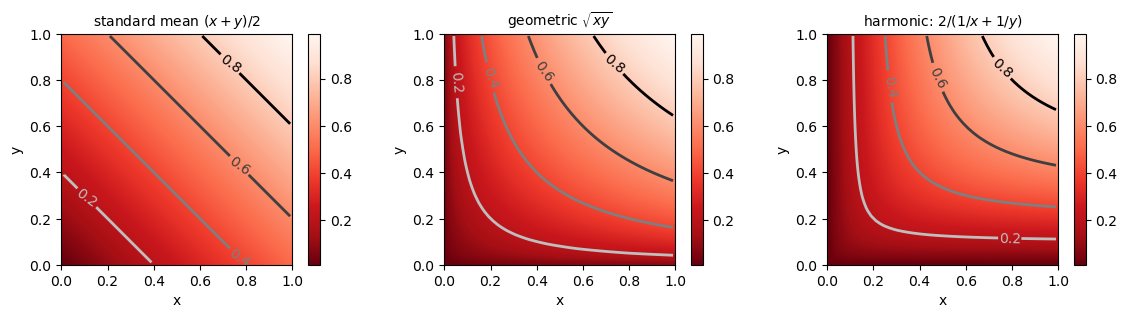

In [12]:
fig, axs = plt.subplots(1, 3, figsize=[14,3])

for i,(ax,fun,name) in enumerate(zip(axs,[mean, geom, harm],['standard mean $(x+y)/2$', 'geometric $\sqrt{xy}$', 'harmonic: $2/(1/x+1/y)$'])):
    x = arange(0.01,1,0.02)
    y = arange(0.01,1,0.02)
    X,Y = meshgrid(x, y) # grid of point
    Z = fun(X, Y) # evaluation of the function on the grid
    
    im = ax.imshow(Z,cmap=cm.Reds_r, extent=[0,1,0,1], origin='lower') # drawing the function
    #im = imshow(Z,cmap=cm.Reds_r, origin='lower') # drawing the function
    im.set_interpolation('bilinear')

    # adding the Contour lines with labels
    cset = ax.contour(X,Y,Z,arange(0,1,0.2),linewidths=2,cmap=cm.binary, origin='lower')
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

    
    # adding the Contour lines with labels
    colorbar(im) # adding the colobar on the right
    #plt.gca().invert_yaxis()
    # latex fashion title
    FONT_SIZE = 10
    ax.set_title(name, fontsize=FONT_SIZE)
    ax.set_xlabel('x', fontsize=FONT_SIZE)
    ax.set_ylabel('y', fontsize=FONT_SIZE)
    #ax.show()